<a href="https://colab.research.google.com/github/saugata-malakar/ML-CaPsule/blob/master/Webscrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Step 1: Download and Render the HTML Page
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os

url = "https://02shishirareddy.blogspot.com/2021/06/a-32-year-old-male-with-chief.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Save HTML for later rendering
with open("blogpage.html", "w", encoding='utf-8') as file:
    file.write(soup.prettify())


In [3]:
# Step 2: Extract images and hyperlinks
images = []
hyperlinks = []

for img_tag in soup.find_all("img"):
    img_url = urljoin(url, img_tag.get("src"))
    images.append(img_url)

for a_tag in soup.find_all("a", href=True):
    link = urljoin(url, a_tag.get("href"))
    hyperlinks.append(link)

# Save them locally
os.makedirs("images", exist_ok=True)

for i, img_url in enumerate(images):
    img_data = requests.get(img_url).content
    with open(f"images/image_{i}.jpg", "wb") as handler:
        handler.write(img_data)

print("Extracted Images:", images)
print("Extracted Hyperlinks:", hyperlinks)


Extracted Images: ['https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEjnuqZjSR74uUeQevP-beJiad2hdSQieQRqdcqbksSY_MFPocUPfQBxVlFf0QaBj4U4EhW7tOCcegBaSHdrF1myiogjhS01E_Eetyqsky7I1XHSZT8CdaQL3Z-5bqCd57TQh6tGdzyrwl5Y/s1600/1623000262151635-0.png', 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEghcC-K-IeGINHvHh1TFJGdC-dYvME8YOGas7VXe3O3ZgtHUKtzr-YK1vHyvEdw1-tkGR9gXkba34chfYNM6axxqavaKi53OlAkPihlZrBYXLahfpUgVEx_i1-vVaQLEUN2_5Iop9W5CIw-/s1600/1623000254603298-1.png', 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEgwvykU6OxfetZ-ahCTHmMMehG9f54lv3k_dyYCC2EvBPT7O9AOy6I7i6UXNSCIQGfDRm16g9pMD0ZTuv4-grCpwHtAaywITdul8nWIaeUd_7NNx5t6yas-8r77WfrhOvANrVXW8vbp95iV/s1600/1623000248151684-2.png', 'https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEiBioZeVsovIWiaFO_SpinoaBXy9NFPO1u1JJ5Z9A9P6VvwrxCiKdzQBRbhv3A1sRGGMPpcAiDY1hk347QRRuMvPCPx1TC26MXvLBW1Zkm4kjZsh3uK4UzqWKxfvfg5YqUU6dPWWV3-BW86/s1600/1623000242164423-3.png', 'https://blogger.googleusercontent.com/img/b/

In [4]:
!pip install easyocr opencv-python==4.5.5.64 numpy==1.21.4


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.4 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [ ]:
import os
os.kill(os.getpid(), 9)  # Restarts runtime


In [5]:
# This cell should remain after the runtime restart
import os
import easyocr

reader = easyocr.Reader(['en'])  # English language
ocr_results = {}

image_dir = "images"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_path in image_files:
    full_path = os.path.join(image_dir, img_path)
    try:
        result = reader.readtext(full_path, detail=0)  # detail=0 returns plain text
        ocr_results[img_path] = result
    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
        ocr_results[img_path] = [f"Error: {e}"]

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [4]:
!pip install easyocr


  Using cached easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 26.9

In [6]:
# Step 4: Basic filtering for medical terms using keywords
keywords = ['BP', 'fever', 'pulse', 'diagnosis', 'treatment', 'tablet', 'mg', 'symptom']

filtered_results = {}
for img, texts in ocr_results.items():
    filtered = [line for line in texts if any(k.lower() in line.lower() for k in keywords)]
    filtered_results[img] = filtered

# Display filtered output
for img, text in filtered_results.items():
    print(f"Filtered medical data from {img}:")
    print("\n".join(text))


Filtered medical data from image_3.jpg:
mgldl
mgldl
Filtered medical data from image_1.jpg:

Filtered medical data from image_6.jpg:

Filtered medical data from image_8.jpg:

Filtered medical data from image_7.jpg:

Filtered medical data from image_5.jpg:

Filtered medical data from image_9.jpg:

Filtered medical data from image_0.jpg:
COMPLETE BLOOD PICTURE (CBP)
Filtered medical data from image_2.jpg:
mgldl
mgldl
mgldl
mgldl
mgldl
Filtered medical data from image_4.jpg:



In [7]:
# Install TensorFlow, which includes Keras
!pip install tensorflow

# Step 5: Train a simple text classification model
# Import necessary libraries from tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer # Correct import path
from tensorflow.keras.preprocessing.sequence import pad_sequences # Correct import path
import numpy as np

# Sample data
# Ensure texts list is not empty and contains valid strings
texts = sum(ocr_results.values(), [])  # flatten list of lines

# Filter out any potential non-string items resulting from error handling or empty lists
texts = [str(t) for t in texts if isinstance(t, str) and t.strip()]

# Only proceed if there are valid texts to process
if texts:
    labels = [1 if any(k in t.lower() for k in keywords) else 0 for t in texts]  # 1: medical, 0: not

    # Tokenize
    tokenizer = Tokenizer(num_words=5000)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)

    # Define a maximum sequence length. Using a reasonable value based on the previous code (50).
    # You might need to adjust this based on the typical length of your OCR text lines.
    maxlen = 50
    X = pad_sequences(sequences, maxlen=maxlen)
    y = np.array(labels)

    # Check if there are enough samples after filtering
    if len(X) > 0:
        # CNN model
        model = Sequential([
            # Adjust input_length based on maxlen
            Embedding(input_dim=5000, output_dim=64, input_length=maxlen),
            Conv1D(64, 5, activation='relu'),
            GlobalMaxPooling1D(),
            Dense(10, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        # Ensure there's data to fit the model
        if len(X) == len(y) and len(X) > 0:
            model.fit(X, y, epochs=5, batch_size=8)
        else:
            print("Not enough data to train the model after filtering.")
    else:
        print("No valid text data found after processing OCR results and filtering.")
else:
    print("No text data extracted from OCR results.")

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


FailedPreconditionError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start

  File "/usr/local/lib/python3.11/dist-packages/tornado/platform/asyncio.py", line 205, in start

  File "/usr/lib/python3.11/asyncio/base_events.py", line 608, in run_forever

  File "/usr/lib/python3.11/asyncio/base_events.py", line 1936, in _run_once

  File "/usr/lib/python3.11/asyncio/events.py", line 84, in _run

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 499, in process_one

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelbase.py", line 730, in execute_request

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/ipkernel.py", line 383, in do_execute

  File "/usr/local/lib/python3.11/dist-packages/ipykernel/zmqshell.py", line 528, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-7-60ba362889cf>", line 49, in <cell line: 0>

  File "/usr/local/lib/python3.11/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 371, in fit

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 219, in function

  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/trainer.py", line 132, in multi_step_on_iterator

DNN library initialization failed. Look at the errors above for more details.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_multi_step_on_iterator_1853]

In [8]:
pip install requests beautifulsoup4 pandas easyocr tqdm


Found 383 URLs to process.


  0%|          | 0/383 [00:00<?, ?it/s]

Error processing image https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj1UosvkIOYguLfI0M7lAa37hG2KFJyDSnKTUfVlimIsM5TjuZCxXZK7ZNhL0IrM4vKu9z-2cY8EKK2La1eF5g1U2aPtV__nmQzmIE4eSRDfoi2JUu1dkX0cTn8GXR8iZAFNyNY3UqvF7fvDGXWtGCvt7YuxkkrZ1S-dm0Yl0HeChgCohJipdhDo9NynukX/s320/ebm-pyramid.gif from https://classworkdecjan.blogspot.com/: 'NoneType' object has no attribute 'shape'


  4%|▍         | 17/383 [02:45<1:39:34, 16.32s/it]

Error processing image blob:https://web.whatsapp.com/1b40ccad-f38b-4b0c-b94d-6b9e14ea019e from https://127rohithsomani.blogspot.com/2021/06/medicine-case-discussion-9th-june-2021.html: No connection adapters were found for 'blob:https://web.whatsapp.com/1b40ccad-f38b-4b0c-b94d-6b9e14ea019e'
Error processing image blob:https://web.whatsapp.com/1b40ccad-f38b-4b0c-b94d-6b9e14ea019e from https://127rohithsomani.blogspot.com/2021/06/medicine-case-discussion-9th-june-2021.html: No connection adapters were found for 'blob:https://web.whatsapp.com/1b40ccad-f38b-4b0c-b94d-6b9e14ea019e'
Error processing image blob:https://web.whatsapp.com/1b40ccad-f38b-4b0c-b94d-6b9e14ea019e from https://127rohithsomani.blogspot.com/2021/06/medicine-case-discussion-9th-june-2021.html: No connection adapters were found for 'blob:https://web.whatsapp.com/1b40ccad-f38b-4b0c-b94d-6b9e14ea019e'


  5%|▌         | 21/383 [03:27<1:06:45, 11.07s/it]

Error processing https://143vibhahegde.blogspot.com/2021/05/covid-in-26-yo-female.html: 404 Client Error: Not Found for url: https://143vibhahegde.blogspot.com/2021/05/covid-in-26-yo-female.html
Error processing https://143vibhahegde.blogspot.com/2021/05/wernickes-encephalopathy.html: 404 Client Error: Not Found for url: https://143vibhahegde.blogspot.com/2021/05/wernickes-encephalopathy.html


  6%|▋         | 24/383 [03:57<1:02:04, 10.38s/it]

Error processing https://1601006025.blogspot.com/2021/07/45-year-old-male-patient-with-right.html: 404 Client Error: Not Found for url: https://1601006025.blogspot.com/2021/07/45-year-old-male-patient-with-right.html


  7%|▋         | 26/383 [03:57<36:30,  6.14s/it]  

Error processing https://1601006046.blogspot.com/2021/07/medicine-62-year-old-female-homemaker.html: 404 Client Error: Not Found for url: https://1601006046.blogspot.com/2021/07/medicine-62-year-old-female-homemaker.html


  7%|▋         | 27/383 [04:00<32:14,  5.43s/it]

Error processing https://1701006181kims6sem.blogspot.com/2021/05/medicine-case-discussion.html: 404 Client Error: Not Found for url: https://1701006181kims6sem.blogspot.com/2021/05/medicine-case-discussion.html


 14%|█▍        | 53/383 [12:58<2:51:48, 31.24s/it]

Error processing https://abhignyareddy71.blogspot.com/2021/05/51-year-old-female-with-difficulty-in.html: 404 Client Error: Not Found for url: https://abhignyareddy71.blogspot.com/2021/05/51-year-old-female-with-difficulty-in.html


 19%|█▊        | 71/383 [16:13<41:06,  7.91s/it]  

Error processing https://alekhya09.blogspot.com/2021/10/28-yr-old-male.html: 404 Client Error: Not Found for url: https://alekhya09.blogspot.com/2021/10/28-yr-old-male.html
Error processing https://alekhya09.blogspot.com/2021/10/a-40-yr-old-male-works-in-milk-dairy.html: 404 Client Error: Not Found for url: https://alekhya09.blogspot.com/2021/10/a-40-yr-old-male-works-in-milk-dairy.html
Error processing https://alekhya09.blogspot.com/2021/10/a-70-year-old-malefarmer-by-occupation.html: 404 Client Error: Not Found for url: https://alekhya09.blogspot.com/2021/10/a-70-year-old-malefarmer-by-occupation.html


 20%|█▉        | 75/383 [16:14<15:49,  3.08s/it]

Error processing https://alekhya09.blogspot.com/2021/10/dengue-24000.html: 404 Client Error: Not Found for url: https://alekhya09.blogspot.com/2021/10/dengue-24000.html
Error processing https://alekhya09.blogspot.com/2021/11/osa.html: 404 Client Error: Not Found for url: https://alekhya09.blogspot.com/2021/11/osa.html
Error processing https://alekhya09.blogspot.com/2021/11/viral-pyrexia.html: 404 Client Error: Not Found for url: https://alekhya09.blogspot.com/2021/11/viral-pyrexia.html


 23%|██▎       | 87/383 [20:16<1:16:27, 15.50s/it]

Error processing https://aparna1907.blogspot.com/2021/08/general-medicine-case-1.html: 404 Client Error: Not Found for url: https://aparna1907.blogspot.com/2021/08/general-medicine-case-1.html


 25%|██▌       | 97/383 [21:57<44:44,  9.39s/it]  

Error processing https://avani89.blogspot.com/2021/09/70-year-female.html: 404 Client Error: Not Found for url: https://avani89.blogspot.com/2021/09/70-year-female.html


 26%|██▌       | 99/383 [22:00<25:25,  5.37s/it]

Error processing https://bejugamomnivasguptha.blogspot.com/2021/05/a-45-years-old-female-patient-with.html: 404 Client Error: Not Found for url: https://bejugamomnivasguptha.blogspot.com/2021/05/a-45-years-old-female-patient-with.html


 29%|██▉       | 112/383 [23:57<23:59,  5.31s/it]

Error processing https://case1192kshitijsharma.blogspot.com/2021/10/this-is-online-e-log-book-to-discuss.html: 404 Client Error: Not Found for url: https://case1192kshitijsharma.blogspot.com/2021/10/this-is-online-e-log-book-to-discuss.html
Error processing https://casehistoriesbyaishwarya89.blogspot.com/2021/06/note-this-is-online-e-log-book-recorded.html: 404 Client Error: Not Found for url: https://casehistoriesbyaishwarya89.blogspot.com/2021/06/note-this-is-online-e-log-book-recorded.html
Error processing https://casehistoriesbyaishwarya89.blogspot.com/2021/11/a-37-yo-male-came-with-complaints-of.html: 404 Client Error: Not Found for url: https://casehistoriesbyaishwarya89.blogspot.com/2021/11/a-37-yo-male-came-with-complaints-of.html


 34%|███▍      | 130/383 [28:39<21:33,  5.11s/it]

Error processing https://csravanthi.blogspot.com/2021/05/medicine-case-discussion.html: 404 Client Error: Not Found for url: https://csravanthi.blogspot.com/2021/05/medicine-case-discussion.html
Error processing https://csravanthi.blogspot.com/2021/09/65-year-old-male-with-dysphagia.html: 404 Client Error: Not Found for url: https://csravanthi.blogspot.com/2021/09/65-year-old-male-with-dysphagia.html


 37%|███▋      | 140/383 [30:05<32:34,  8.04s/it]

Error processing image  from https://deepika21kd.blogspot.com/2021/08/30-year-old-female-ascitis.html: No connection adapters were found for ''
Error processing image  from https://deepika21kd.blogspot.com/2021/08/30-year-old-female-ascitis.html: No connection adapters were found for ''
Error processing image  from https://deepika21kd.blogspot.com/2021/08/30-year-old-female-ascitis.html: No connection adapters were found for ''
Error processing image  from https://deepika21kd.blogspot.com/2021/08/30-year-old-female-ascitis.html: No connection adapters were found for ''
Error processing image  from https://deepika21kd.blogspot.com/2021/08/30-year-old-female-ascitis.html: No connection adapters were found for ''
Error processing image  from https://deepika21kd.blogspot.com/2021/08/30-year-old-female-ascitis.html: No connection adapters were found for ''
Error processing image  from https://deepika21kd.blogspot.com/2021/08/30-year-old-female-ascitis.html: No connection adapters were found
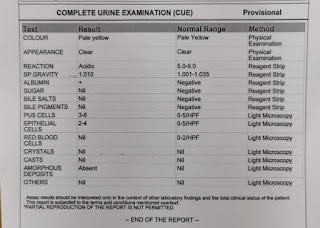
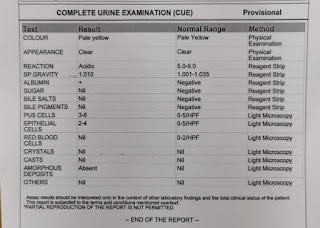
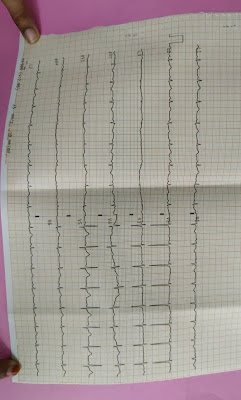
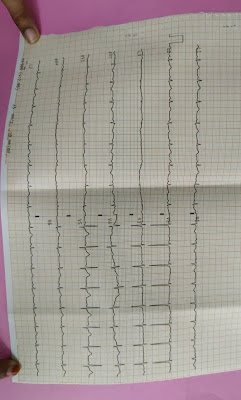
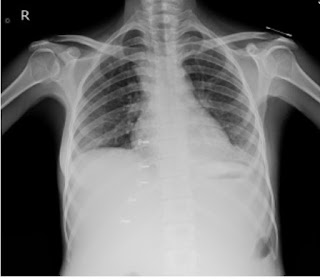
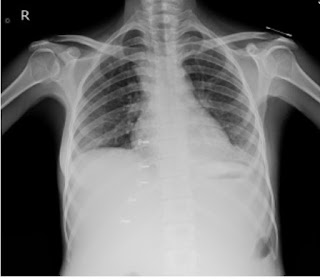
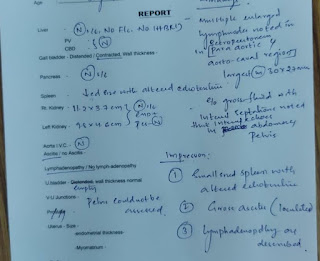
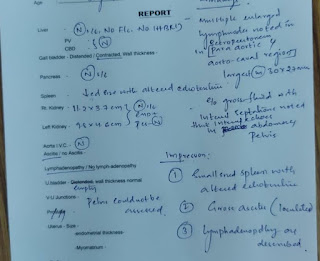
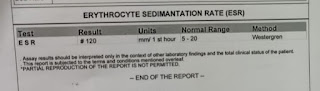
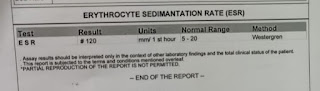
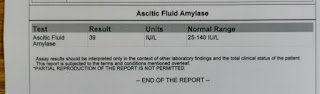
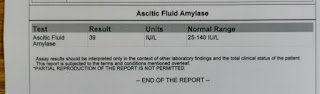
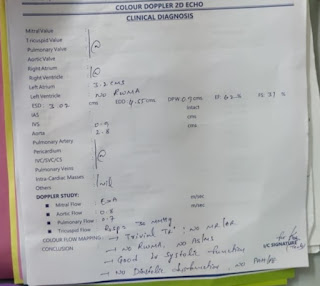
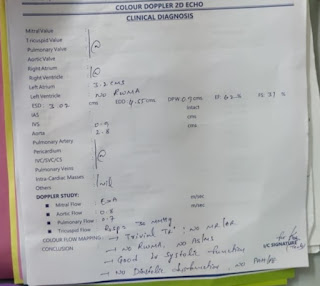

 37%|███▋      | 143/383 [30:27<25:29,  6.37s/it]

Error processing https://derangedphysiology.com/main/cicm-primary-exam/required-reading/respiratory-system/Chapter%20542/practical-differences-between-pressure-and-volume-controlled-ventilation: 403 Client Error: Forbidden for url: https://derangedphysiology.com/main/cicm-primary-exam/required-reading/respiratory-system/Chapter%20542/practical-differences-between-pressure-and-volume-controlled-ventilation


 39%|███▉      | 149/383 [30:49<12:38,  3.24s/it]

Error processing https://drhudafirdouse.blogspot.com/2021/10/55-year-female-with-fever-vomitings-and.html: 404 Client Error: Not Found for url: https://drhudafirdouse.blogspot.com/2021/10/55-year-female-with-fever-vomitings-and.html
Error processing https://drkulkarnimd.blogspot.com/2021/09/13-f-with-fever-sob.html: 404 Client Error: Not Found for url: https://drkulkarnimd.blogspot.com/2021/09/13-f-with-fever-sob.html
Error processing https://drkulkarnimd.blogspot.com/2021/12/38m-with-pruritic-rashes-pedal-edema.html: 404 Client Error: Not Found for url: https://drkulkarnimd.blogspot.com/2021/12/38m-with-pruritic-rashes-pedal-edema.html
Error processing https://drkulkarnimd.blogspot.com/2022/02/30m-with-post-renal-transplantation.html: 404 Client Error: Not Found for url: https://drkulkarnimd.blogspot.com/2022/02/30m-with-post-renal-transplantation.html
Error processing image file:///data/user/0/com.microsoft.office.word/files/temp/msohtmlclip/clip_image002.png from https://drkulkarnit

 48%|████▊     | 185/383 [40:29<17:18,  5.25s/it]

Error processing https://generalmedicinedepartment.blogspot.com/2021/06/bimonthly-formative-and-summative.html: 404 Client Error: Not Found for url: https://generalmedicinedepartment.blogspot.com/2021/06/bimonthly-formative-and-summative.html


 60%|██████    | 231/383 [55:35<40:15, 15.89s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning:

Error processing https://jyothsnanandipatirollno113.blogspot.com/2021/10/70year-old-male-with-altered-sensorium.html: 404 Client Error: Not Found for url: https://jyothsnanandipatirollno113.blogspot.com/2021/10/70year-old-male-with-altered-sensorium.html


 63%|██████▎   | 241/383 [56:05<05:39,  2.39s/it]

Error processing https://kalpanamiryala83.blogspot.com/2021/05/viral-pneumonia-secondary-to-covid-19.html: 404 Client Error: Not Found for url: https://kalpanamiryala83.blogspot.com/2021/05/viral-pneumonia-secondary-to-covid-19.html
Error processing https://kalpanamiryala83.blogspot.com/2021/06/a-32-year-old-male-with-acute.html: 404 Client Error: Not Found for url: https://kalpanamiryala83.blogspot.com/2021/06/a-32-year-old-male-with-acute.html


 63%|██████▎   | 243/383 [56:15<07:37,  3.27s/it]

Error processing https://kanchisuprajarollnumber78.blogspot.com/2021/08/46yr-old-male-with-complains-of-left.html: 404 Client Error: Not Found for url: https://kanchisuprajarollnumber78.blogspot.com/2021/08/46yr-old-male-with-complains-of-left.html
Error processing https://kanchisuprajarollnumber78.blogspot.com/2021/08/50-yr-old-male-kco-ckd-on-hemodialysis.html: 404 Client Error: Not Found for url: https://kanchisuprajarollnumber78.blogspot.com/2021/08/50-yr-old-male-kco-ckd-on-hemodialysis.html


 64%|██████▍   | 245/383 [56:21<07:21,  3.20s/it]

Error processing image https://blogger.googleusercontent.com/img/a/AVvXsEhTRiBxEGgSWYBuaipHXtZdImJUEM4yiG0K7s4Xwb-AEn1AzB2yP1JMW-yyFOSvzL8WOIpjtSBfZyHEANtKptGPpbbZUQPhPmFnR4DCvNpzB0AD8lHf9AXUZtDTs1Z1yhGm6B1Bc4LXuuUA3Fuyg18nXhTqn9zsjtxT6pHPgiE90az_SvDWCoHea_7EDA=w321-h297 from https://karnativaishnavi.blogspot.com/2021/08/cushings-syndrome.html: 'NoneType' object has no attribute 'shape'


 66%|██████▌   | 251/383 [57:23<13:41,  6.22s/it]

Error processing https://katanaveenkumar.blogspot.com/2021/08/a-59-year-old-male-came-to-casuality.html: 404 Client Error: Not Found for url: https://katanaveenkumar.blogspot.com/2021/08/a-59-year-old-male-came-to-casuality.html


 67%|██████▋   | 255/383 [58:07<15:05,  7.07s/it]

Error processing image  from https://kattekolasathwik.blogspot.com/2021/09/case-4-seizures-secondary-to.html: No connection adapters were found for ''

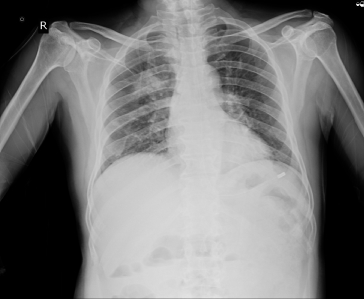
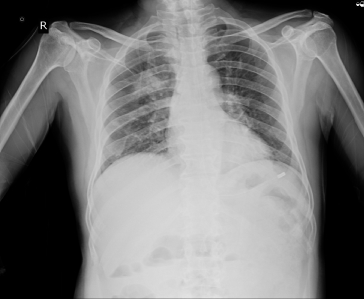

 69%|██████▉   | 265/383 [58:45<03:08,  1.59s/it]

Error processing https://www.blogger.com/share-post.g?blogID=5015985844424241367&postID=3936820209952996941&target=twitter: 400 Client Error: Bad Request for url: https://x.com/intent/tweet?url=https://classworkdecjan.blogspot.com/2022/02/udhc-cases-mirror-2.html?spref%3Dtw&text=classwork:+UDHC+cases+mirror+-+2
Error processing image https://static.xx.fbcdn.net/rsrc.php/y1/r/4lCu2zih0ca.svg from https://www.blogger.com/share-post.g?blogID=5015985844424241367&postID=3936820209952996941&target=facebook: 'NoneType' object has no attribute 'ReadAsArray'


 70%|███████   | 270/383 [58:49<01:51,  1.01it/s]

Error processing image https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj1UosvkIOYguLfI0M7lAa37hG2KFJyDSnKTUfVlimIsM5TjuZCxXZK7ZNhL0IrM4vKu9z-2cY8EKK2La1eF5g1U2aPtV__nmQzmIE4eSRDfoi2JUu1dkX0cTn8GXR8iZAFNyNY3UqvF7fvDGXWtGCvt7YuxkkrZ1S-dm0Yl0HeChgCohJipdhDo9NynukX/s320/ebm-pyramid.gif from https://classworkdecjan.blogspot.com/: 'NoneType' object has no attribute 'shape'


 71%|███████   | 271/383 [59:11<13:33,  7.27s/it]<ipython-input-9-9a641e773b44>:43: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(response.text, 'html.parser')
 72%|███████▏  | 275/383 [59:14<03:52,  2.15s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj1UosvkIOYguLfI0M7lAa37hG2KFJyDSnKTUfVlimIsM5TjuZCxXZK7ZNhL0IrM4vKu9z-2cY8EKK2La1eF5g1U2aPtV__nmQzmIE4eSRDfoi2JUu1dkX0cTn8GXR8iZAFNyNY3UqvF7fvDGXWtGCvt7YuxkkrZ1S-dm0Yl0HeChgCohJipdhDo9NynukX/s320/ebm-pyramid.gif from https://classworkdecjan.blogspot.com/2024/: 'NoneType' object has no attribute 'shape'


 72%|███████▏  | 277/383 [59:33<09:50,  5.57s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 73%|███████▎  | 279/383 [59:33<05:58,  3.45s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 73%|███████▎  | 281/383 [59:34<04:00,  2.36s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 74%|███████▍  | 283/383 [59:47<06:12,  3.73s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 74%|███████▍  | 285/383 [59:54<06:01,  3.69s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj1UosvkIOYguLfI0M7lAa37hG2KFJyDSnKTUfVlimIsM5TjuZCxXZK7ZNhL0IrM4vKu9z-2cY8EKK2La1eF5g1U2aPtV__nmQzmIE4eSRDfoi2JUu1dkX0cTn8GXR8iZAFNyNY3UqvF7fvDGXWtGCvt7YuxkkrZ1S-dm0Yl0HeChgCohJipdhDo9NynukX/s320/ebm-pyramid.gif from https://classworkdecjan.blogspot.com/2024/02/: 'NoneType' object has no attribute 'shape'


 75%|███████▍  | 287/383 [59:57<04:51,  3.04s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 75%|███████▌  | 289/383 [59:59<03:38,  2.33s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 76%|███████▌  | 291/383 [1:00:00<02:42,  1.76s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 77%|███████▋  | 293/383 [1:00:00<01:56,  1.29s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://inmed247.000webhostapp.com/wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.29.49-PM-566x1024.jpeg from https://classworkdecjan.blogspot.com/2022/: HTTPSConnectionPool(host='inmed247.000webhostapp.com', port=443): Max retries exceeded with url: /wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.29.49-PM-566x1024.jpeg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7980612a48d0>: Failed to resolve 'inmed247.000webhostapp.com' ([Errno -2] Name or service not known)"))
Error processing image https://inmed247.000webhostapp.com/wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.29.50-PM-1-480x1024.jpeg from https://classworkdecjan.blogspot.com/2022/: HTTPSConnectionPool(host='inmed247.000webhostapp.com', port=443): Max retries exceeded with url: /wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.29.50-P

 77%|███████▋  | 295/383 [1:01:18<18:36, 12.69s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 78%|███████▊  | 297/383 [1:01:19<12:55,  9.01s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://inmed247.000webhostapp.com/wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.29.49-PM-566x1024.jpeg from https://classworkdecjan.blogspot.com/2022/04/: HTTPSConnectionPool(host='inmed247.000webhostapp.com', port=443): Max retries exceeded with url: /wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.29.49-PM-566x1024.jpeg (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7980fcf92b90>: Failed to resolve 'inmed247.000webhostapp.com' ([Errno -2] Name or service not known)"))
Error processing image https://inmed247.000webhostapp.com/wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.29.50-PM-1-480x1024.jpeg from https://classworkdecjan.blogspot.com/2022/04/: HTTPSConnectionPool(host='inmed247.000webhostapp.com', port=443): Max retries exceeded with url: /wp-content/uploads/2022/04/WhatsApp-Image-2022-04-06-at-7.2

 78%|███████▊  | 299/383 [1:02:20<21:42, 15.50s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 81%|████████  | 310/383 [1:02:25<01:32,  1.27s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj6qC5GQU6gr6tT0yamg4AoXULUKt-IFF0XgaFViJSh-ByIYdHCJGK5DZ9walwTWOCzqVcMopjrxU10L1rhwOsmgPm8f_bDvqXoustmGbw3MkgGoZZ5Q5rT8gE_qTKD99bnFmOSELTEw3ZX/ from https://classworkdecjan.blogspot.com/2021/: could not broadcast input array from shape (1,828) into shape (1,828,714)


 81%|████████▏ | 312/383 [1:03:24<16:34, 14.01s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 82%|████████▏ | 314/383 [1:03:35<12:18, 10.70s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 83%|████████▎ | 316/383 [1:03:44<09:17,  8.32s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 83%|████████▎ | 318/383 [1:03:52<07:28,  6.90s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 84%|████████▎ | 320/383 [1:04:01<06:29,  6.19s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 84%|████████▍ | 322/383 [1:04:11<05:47,  5.70s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 85%|████████▍ | 324/383 [1:04:12<04:01,  4.09s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEj6qC5GQU6gr6tT0yamg4AoXULUKt-IFF0XgaFViJSh-ByIYdHCJGK5DZ9walwTWOCzqVcMopjrxU10L1rhwOsmgPm8f_bDvqXoustmGbw3MkgGoZZ5Q5rT8gE_qTKD99bnFmOSELTEw3ZX/ from https://classworkdecjan.blogspot.com/2021/03/: could not broadcast input array from shape (1,828) into shape (1,828,714)


 85%|████████▌ | 326/383 [1:04:14<03:03,  3.22s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 86%|████████▌ | 328/383 [1:04:19<02:38,  2.89s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 86%|████████▌ | 330/383 [1:04:22<02:16,  2.57s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 87%|████████▋ | 332/383 [1:05:03<06:45,  7.96s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 87%|████████▋ | 334/383 [1:05:04<04:38,  5.68s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 88%|████████▊ | 336/383 [1:05:04<03:10,  4.05s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 88%|████████▊ | 338/383 [1:05:05<02:10,  2.90s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 89%|████████▉ | 340/383 [1:05:20<03:03,  4.27s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 89%|████████▉ | 342/383 [1:05:29<03:00,  4.40s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 90%|████████▉ | 344/383 [1:05:31<02:09,  3.31s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 90%|█████████ | 346/383 [1:05:48<03:01,  4.91s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 91%|█████████ | 348/383 [1:06:30<05:39,  9.71s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 91%|█████████▏| 350/383 [1:07:25<08:19, 15.14s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 92%|█████████▏| 352/383 [1:07:28<05:40, 10.97s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 92%|█████████▏| 354/383 [1:07:59<05:56, 12.29s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 93%|█████████▎| 356/383 [1:08:04<04:14,  9.42s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 93%|█████████▎| 358/383 [1:08:05<02:49,  6.80s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 94%|█████████▍| 360/383 [1:08:06<01:52,  4.90s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 95%|█████████▍| 362/383 [1:08:10<01:23,  3.99s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 95%|█████████▌| 364/383 [1:08:11<00:54,  2.88s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 96%|█████████▌| 366/383 [1:09:34<04:06, 14.50s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 96%|█████████▌| 368/383 [1:10:10<03:53, 15.56s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 97%|█████████▋| 370/383 [1:10:12<02:25, 11.20s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 97%|█████████▋| 372/383 [1:10:13<01:27,  7.95s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 98%|█████████▊| 374/383 [1:10:13<00:50,  5.64s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 98%|█████████▊| 376/383 [1:10:16<00:30,  4.33s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'


 99%|█████████▊| 378/383 [1:11:33<01:12, 14.60s/it]

Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://scontent.fccu2-1.fna.fbcdn.net/v/t1.0-1/c5.0.32.32/p32x32/550672_10151103765484502_1924026228_n.jpg?oh=837cfcebacba0c3f267e223b882e77da&oe=58EA4FC7 from https://classworkdecjan.blogspot.com/2016/: 'NoneType' object has no attribute 'ReadAsArray'
Error processing image https://external.fccu2-1.fna.fbcdn.net/safe_image.php?d=AQCpsBa_r6YRddOJ&w=286&h=394&url=https%3A%2F%2Flh3.googleusercontent.com%2F-DSS59ea_RY8%2FWGPQdqyMNRI%2FAAAAAAAAAqs%2F3LuuQZQKijw%2Fs1600%2FIMG_20161228_130031_1482934556474.jpg&_nc_hash=AQAuJqLmufr55lvw from https://classworkdecjan.blogspot.com/2016/: 'NoneType' object has no attribute 'ReadAsArray'
Error processing image https://scontent.fccu2-1.fna.fbcdn.net/v/t1.0-1/c0.8.32.32/p32x32/25275_10150155661010431_1016381_n.jpg?oh=e81fdfa95980280739b32fe67df4fbe1&oe=58E87DD8 from https://classworkdecjan.blogspot.com/2016/: 'NoneType' object has 

 99%|█████████▉| 380/383 [1:12:02<00:43, 14.63s/it]

Error processing image https://scontent.fccu2-1.fna.fbcdn.net/v/t1.0-1/c5.0.32.32/p32x32/550672_10151103765484502_1924026228_n.jpg?oh=837cfcebacba0c3f267e223b882e77da&oe=58EA4FC7 from https://classworkdecjan.blogspot.com/2016/: 'NoneType' object has no attribute 'ReadAsArray'
Error processing javascript:void(0): No connection adapters were found for 'javascript:void(0)'
Error processing image https://scontent.fccu2-1.fna.fbcdn.net/v/t1.0-1/c5.0.32.32/p32x32/550672_10151103765484502_1924026228_n.jpg?oh=837cfcebacba0c3f267e223b882e77da&oe=58EA4FC7 from https://classworkdecjan.blogspot.com/2016/12/: 'NoneType' object has no attribute 'ReadAsArray'
Error processing image https://external.fccu2-1.fna.fbcdn.net/safe_image.php?d=AQCpsBa_r6YRddOJ&w=286&h=394&url=https%3A%2F%2Flh3.googleusercontent.com%2F-DSS59ea_RY8%2FWGPQdqyMNRI%2FAAAAAAAAAqs%2F3LuuQZQKijw%2Fs1600%2FIMG_20161228_130031_1482934556474.jpg&_nc_hash=AQAuJqLmufr55lvw from https://classworkdecjan.blogspot.com/2016/12/: 'NoneType' o

100%|█████████▉| 382/383 [1:12:30<00:14, 14.38s/it]/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarnin

✅ Data extraction complete. Saved to extracted_data.csv


In [9]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.parse import urljoin
from tqdm import tqdm
import easyocr

# Setup
reader = easyocr.Reader(['en'])
os.makedirs("images", exist_ok=True)

# Load 250 URLs from the blog page
# Use requests to get the content from the URL, then parse it to extract the list of URLs
url_list_page = "https://classworkdecjan.blogspot.com/2022/02/udhc-cases-mirror-2.html"
try:
    response_list_page = requests.get(url_list_page, timeout=10)
    response_list_page.raise_for_status() # Raise an exception for bad status codes
    soup_list_page = BeautifulSoup(response_list_page.text, 'html.parser')

    # Assuming the URLs are listed as links on this page
    # You might need to adjust this based on how the URLs are formatted on the page.
    # This example extracts all href attributes from <a> tags.
    urls = [a['href'] for a in soup_list_page.find_all('a', href=True)]
    urls = [urljoin(url_list_page, url) for url in urls] # Ensure URLs are absolute

    # You might need additional filtering here if not all links are case URLs
    # Example: urls = [url for url in urls if 'udhc-cases' in url]

    print(f"Found {len(urls)} URLs to process.")

except requests.exceptions.RequestException as e:
    print(f"Error fetching the list of URLs from {url_list_page}: {e}")
    urls = [] # Continue with an empty list if fetching fails

# Prepare output list
all_data = []

for url in tqdm(urls):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status() # Raise an exception for bad status codes
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract text (excluding script/style)
        for script in soup(['script', 'style']):
            script.extract()
        visible_text = soup.get_text(separator=' ')
        clean_text = " ".join(visible_text.split())

        # Extract hyperlinks
        hyperlinks = [urljoin(url, a['href']) for a in soup.find_all('a', href=True)]

        # Extract image URLs
        image_tags = soup.find_all('img')
        image_urls = [urljoin(url, img.get("src")) for img in image_tags if img.get("src")]

        # Download and OCR images
        ocr_texts = []
        for i, img_url in enumerate(image_urls):
            # Create a more robust image name
            img_name = f"images/{url.replace('/', '_').replace(':', '')}_{i}.jpg"
            try:
                img_data = requests.get(img_url, timeout=5).content
                with open(img_name, "wb") as handler:
                    handler.write(img_data)

                ocr_result = reader.readtext(img_name, detail=0)
                ocr_texts.extend(ocr_result)
            except Exception as img_e:
                # Print a specific error for image processing issues
                print(f"Error processing image {img_url} from {url}: {img_e}")
                continue  # skip broken images

        all_data.append({
            "Page_URL": url,
            "Image_URLs": "; ".join(image_urls),
            "Hyperlinks": "; ".join(hyperlinks),
            "Text_From_HTML": clean_text,
            "Text_From_Images": " ".join(ocr_texts)
        })

    except requests.exceptions.RequestException as e:
        print(f"Error processing {url}: {e}")
        continue
    except Exception as e:
        print(f"An unexpected error occurred while processing {url}: {e}")
        continue


# Save to CSV
df = pd.DataFrame(all_data)
df.to_csv("extracted_data.csv", index=False)
print("✅ Data extraction complete. Saved to extracted_data.csv")

In [10]:
!pip install easyocr opencv-python==4.5.5.64 numpy==1.21.4


  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.4 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20

In [ ]:
import os
os.kill(os.getpid(), 9)  # Restarts runtime


In [1]:
import os
import easyocr

reader = easyocr.Reader(['en'])  # English language
ocr_results = {}

image_dir = "images"
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

for img_path in image_files:
    full_path = os.path.join(image_dir, img_path)
    try:
        result = reader.readtext(full_path, detail=0)  # detail=0 returns plain text
        ocr_results[img_path] = result
    except Exception as e:
        print(f"❌ Error processing {img_path}: {e}")
        ocr_results[img_path] = [f"Error: {e}"]


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2021_03__1.jpg: could not broadcast input array from shape (1,828) into shape (1,828,714)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__16.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__22.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016__8.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016_12__10.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016_12__29.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016__12.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__17.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__19.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016_12__13.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__32.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016_12__31.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__11.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2024_02__1.jpg: 'NoneType' object has no attribute 'shape'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__20.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016__29.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016_12__18.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016__10.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__19.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016__14.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__24.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__www.blogger.com_share-post.g?blogID=5015985844424241367&postID=3936820209952996941&target=facebook_0.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016__21.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__27.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__15.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__18.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016__33.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com__25.jpg: 'NoneType' object has no attribute 'shape'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__23.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__9.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__33.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__24.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__25.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016_12__26.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__31.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__32.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__15.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__30.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016_12__21.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2021__42.jpg: could not broadcast input array from shape (1,828) into shape (1,828,714)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__9.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__20.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__karnativaishnavi.blogspot.com_2021_08_cushings-syndrome.html_53.jpg: 'NoneType' object has no attribute 'shape'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__12.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016__27.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__17.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__26.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__28.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016__13.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016__30.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016_12__11.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2024__25.jpg: 'NoneType' object has no attribute 'shape'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__25.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016__22.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__23.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__8.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


❌ Error processing https__classworkdecjan.blogspot.com_2016_12__16.jpg: 'NoneType' object has no attribute 'ReadAsArray'


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in by

❌ Error processing https__classworkdecjan.blogspot.com_2016_12__14.jpg: 'NoneType' object has no attribute 'ReadAsArray'
❌ Error processing https__classworkdecjan.blogspot.com_2016__28.jpg: 'NoneType' object has no attribute 'ReadAsArray'


In [8]:
# Display OCR output
for img, text in ocr_results.items():
    print(f"\n🔍 OCR result from {img}:")
    print("\n".join(text) if text else "[No text detected]")


NameError: name 'ocr_results' is not defined

In [13]:
import requests
from bs4 import BeautifulSoup

# Step 1: Load the HTML content of the page
url_index_page = "https://classworkdecjan.blogspot.com/2022/02/udhc-cases-mirror-2.html"
resp = requests.get(url_index_page)
soup = BeautifulSoup(resp.text, 'html.parser')

# Step 2: Extract all hyperlinks that look like blog post links
blog_links = [a['href'] for a in soup.find_all('a', href=True) if 'blogspot.com' in a['href']]

# Optional: remove duplicates and print count
blog_links = list(set(blog_links))
print(f"✅ Found {len(blog_links)} blog links.")

# Now use this in place of reading from 'urls.txt'
urls = blog_links


✅ Found 312 blog links.


In [16]:
!pip install easyocr opencv-python-headless==4.5.5.64 numpy==1.21.4 tqdm


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.4 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [1]:
!pip install easyocr opencv-python-headless==4.5.5.64 numpy==1.21.4 requests beautifulsoup4 pandas tqdm


ERROR: Ignored the following versions that require a different python version: 1.21.2 Requires-Python >=3.7,<3.11; 1.21.3 Requires-Python >=3.7,<3.11; 1.21.4 Requires-Python >=3.7,<3.11; 1.21.5 Requires-Python >=3.7,<3.11; 1.21.6 Requires-Python >=3.7,<3.11
ERROR: Could not find a version that satisfies the requirement numpy==1.21.4 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0, 1.13.1, 1.13.3, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0, 1.21.1, 1.22.0, 1.22.1, 1.22.2, 1.22.3, 1.22.4, 1.23.0, 1.23.1, 1.23.2, 1.23.3, 1.23

In [2]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import easyocr
from tqdm import tqdm
from urllib.parse import urljoin


ModuleNotFoundError: No module named 'easyocr'

In [19]:
reader = easyocr.Reader(['en'])  # Load English OCR model


In [20]:
url_index_page = "https://classworkdecjan.blogspot.com/2022/02/udhc-cases-mirror-2.html"
resp = requests.get(url_index_page)
soup = BeautifulSoup(resp.text, 'html.parser')

# Extract all blog post links
blog_links = [a['href'] for a in soup.find_all('a', href=True) if 'blogspot.com' in a['href']]
blog_links = list(set(blog_links))  # Remove duplicates
print(f"Found {len(blog_links)} blog links.")


Found 312 blog links.


In [21]:
os.makedirs("images", exist_ok=True)


In [5]:
data_rows = []

for url in tqdm(blog_links, desc="Processing blogs"):
    try:
        res = requests.get(url, timeout=10)
        soup = BeautifulSoup(res.text, 'html.parser')

        for tag in soup(['script', 'style']):
            tag.decompose()

        full_text = " ".join(soup.get_text(separator=' ').split())

        # Extract personal details
        age_match = re.search(r'(\d{1,2})[-\s]?year[-\s]?old', full_text, re.IGNORECASE)
        gender_match = re.search(r'\b(Male|Female)\b', full_text, re.IGNORECASE)
        diagnosis_match = re.search(r'(?i)(diagnosis:?\s*)([^.:\n]+)', full_text)

        age = age_match.group(1) if age_match else ""
        gender = gender_match.group(1).capitalize() if gender_match else ""
        diagnosis = diagnosis_match.group(2).strip() if diagnosis_match else ""

        # Process images
        img_tags = soup.find_all("img")
        extracted_texts, img_paths = [], []

        for i, img_tag in enumerate(img_tags):
            img_url = img_tag.get("src")
            if not img_url:
                continue
            img_url = urljoin(url, img_url)
            img_name = f"{url.split('/')[-1]}_{i}.jpg"
            img_path = os.path.join("images", img_name)
            try:
                img_bytes = requests.get(img_url).content
                with open(img_path, "wb") as f:
                    f.write(img_bytes)
                ocr_result = reader.readtext(img_path, detail=0)
                extracted_texts.append(" ".join(ocr_result))
                img_paths.append(img_path)
            except Exception as e:
                extracted_texts.append(f"OCR Error: {e}")
                img_paths.append("")

        # Save structured data
        data_rows.append({
            "Page_URL": url,
            "Age": age,
            "Gender": gender,
            "Diagnosis": diagnosis,
            "HTML_Text": full_text[:1000],  # First 1000 chars
            "Extracted_Image_Text": " | ".join(extracted_texts),
            "Image_Paths": " | ".join(img_paths)
        })

    except Exception as e:
        print(f"Failed for {url}: {e}")


NameError: name 'tqdm' is not defined

In [2]:
import os
import pandas as pd # Ensure pandas is imported

df = pd.DataFrame(data_rows)
csv_path = "/mnt/data/medical_blog_data.csv"

# Create the directory if it doesn't exist
# exist_ok=True prevents an error if the directory already exists
os.makedirs(os.path.dirname(csv_path), exist_ok=True)

df.to_csv(csv_path, index=False)
csv_path

NameError: name 'data_rows' is not defined

In [7]:
df=pd.read_csv('/mnt/data/medical_blog_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/medical_blog_data.csv'

In [3]:
import os
import pandas as pd # Ensure pandas is imported

df = pd.DataFrame(data_rows)
csv_path = "/mnt/data/medical_blog_data.csv"

# Create the directory if it doesn't exist
# exist_ok=True prevents an error if the directory already exists
os.makedirs(os.path.dirname(csv_path), exist_ok=True)

df.to_csv(csv_path, index=False)
csv_path

NameError: name 'data_rows' is not defined

In [30]:
df.head(100)

,Page_URL,Age,Gender,Diagnosis,HTML_Text,Extracted_Image_Text,Image_Paths
0,https://bonthusushma154.blogspot.com/2021/06/m...,51.0,Female,and treatment plan,Medicine Case Discussion Skip to main content ...,| | | | | | HDNCgaLM Pravlalonal Rea Ran...,images/medicine-case-discussion.html_0.jpg | i...
1,https://jancykoneti79.blogspot.com/2021/08/a-6...,65.0,Male,and treatment plan,"A 65 year old male, chronic alcoholic with alt...",| R; | | | Subqtie Km REPORT altued rhat ex...,images/a-60-year-old-male-with-altered.html_0....
2,https://102-crazymandadi.blogspot.com/2021/11/...,47.0,Male,- ? Heart Failure ? CKD ( Diabetic Nephropathy...,47 yr male with ? CKD ( Diabetic Nephropathy) ...,| | | | 5=301 6-3.12 Ci | 7273721/44/2144+...,images/47-yr-male-with-ckd-diabetic.html_0.jpg...
3,https://decodemed.blogspot.com/2021/09/this-is...,NaN,Female,COMPRESSIVE MYELOPATHY 2° to vertebral metasta...,A case of compressive myelopathy secondary to ...,| | MhteICd- ceterc con ' neliaetan Yue Lc e...,images/this-is-online-e-logbook-to-discuss-our...
4,https://102-crazymandadi.blogspot.com/2021/11/...,15.0,Female,Common variable immunodeficiency syndrome with...,15 year old female with Common variable Immuno...,"124 W _ 99 R8s &onj Tol (l 14""004 l AST S8Toll...",images/15-year-old-female-with-common-variable...
...,...,...,...,...,...,...,...
95,https://67ankithareddy.blogspot.com/2021/10/an...,69.0,Male,NaN,Post Renal Aki secondary to Renal caliculi Ski...,~Ccl WIIBAQUND ADCME Ncarzl VEE Cid GCntinnh n...,images/ankitha-reddy-roll-no-67.html_0.jpg | i...
96,https://deekshitha44medicinelogbook.blogspot.c...,42.0,Female,inferior wall mi with uncontrolled sugars and ...,CASE OF A 42 YEAR OLD FEMALE Skip to main cont...,"| J""L OERE erate (ug uhalarit (estrheal hemts...",images/case-of-42-year-old-female.html_0.jpg |...
97,https://casescape.blogspot.com/2021/06/acute-k...,65.0,Female,Acute kidney injury secondary to urosepsis Inv...,Acute Kidney Injury secondary to Urosepsis Ski...,V6asc AliL Jcddcode LlElut | coup ETe Lrine Ex...,images/acute-kidney-injury-secondary-to.html_0...
98,https://kattekolasathwik.blogspot.com/2021/09/...,69.0,Male,and treatment plan,Seizures secondary to Intracranial Bleed + Rig...,| Tbi 59 2- CP01 26 (A64).22-+ Hto )Ct 94'1...,images/case-4-seizures-secondary-to.html_0.jpg...


In [4]:
data_rows = []

for url in tqdm(blog_links, desc="Processing blogs"):
    try:
        res = requests.get(url, timeout=10)
        soup = BeautifulSoup(res.text, 'html.parser')

        for tag in soup(['script', 'style']):
            tag.decompose()

        full_text = " ".join(soup.get_text(separator=' ').split())

        # Extract personal details
        age_match = re.search(r'(\d{1,2})[-\s]?year[-\s]?old', full_text, re.IGNORECASE)
        gender_match = re.search(r'\b(Male|Female)\b', full_text, re.IGNORECASE)
        diagnosis_match = re.search(r'(?i)(diagnosis:?\s*)([^.:\n]+)', full_text)

        age = age_match.group(1) if age_match else ""
        gender = gender_match.group(1).capitalize() if gender_match else ""
        diagnosis = diagnosis_match.group(2).strip() if diagnosis_match else ""

        # Process images
        img_tags = soup.find_all("img")
        extracted_texts, img_paths = [], []

        for i, img_tag in enumerate(img_tags):
            img_url = img_tag.get("src")
            if not img_url:
                continue
            img_url = urljoin(url, img_url)
            img_name = f"{url.split('/')[-1]}_{i}.jpg"
            img_path = os.path.join("images", img_name)
            try:
                img_bytes = requests.get(img_url).content
                with open(img_path, "wb") as f:
                    f.write(img_bytes)
                ocr_result = reader.readtext(img_path, detail=0)
                extracted_texts.append(" ".join(ocr_result))
                img_paths.append(img_path)
            except Exception as e:
                extracted_texts.append(f"OCR Error: {e}")
                img_paths.append("")

        # Save structured data
        data_rows.append({
            "Page_URL": url,
            "Age": age,
            "Gender": gender,
            "Diagnosis": diagnosis,
            "HTML_Text": full_text[:1000],  # First 1000 chars
            "Extracted_Image_Text": " | ".join(extracted_texts),
            "Image_Paths": " | ".join(img_paths)
        })

    except Exception as e:
        print(f"Failed for {url}: {e}")

NameError: name 'tqdm' is not defined

In [1]:
# prompt: get me thi scsv

df=pd.read_csv('/mnt/data/medical_blog_data.csv')
df.head()


NameError: name 'pd' is not defined